In [90]:
import xgboost as xg
print(xg.__version__)

0.72.1


In [91]:
import numpy as np
from IPython.display import Image
import subprocess
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.cross_validation import train_test_split
from sklearn.metrics import log_loss,accuracy_score
#classifiers
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier,export_graphviz

seed=104



In [92]:
X,y=make_classification(n_samples=1000,n_features=20,n_informative=8,n_redundant=3,n_repeated=2,random_state=seed)

In [93]:
X.shape,y.shape

((1000, 20), (1000,))

In [94]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=seed)

In [95]:
X_train.shape

(800, 20)

In [96]:
print(Counter(y_train))
print(Counter(y_test))

Counter({1: 404, 0: 396})
Counter({0: 106, 1: 94})


In [97]:
decision_tree=DecisionTreeClassifier(random_state=seed)
decision_tree.fit(X_train,y_train)
#predict output
dt_y_pred=decision_tree.predict(X_test)
dt_y_pred_prob=decision_tree.predict_proba(X_test)
#evaluation
dt_accuracy=accuracy_score(y_test,dt_y_pred)
dt_logloss=log_loss(y_test,dt_y_pred_prob)
print("accuracy :{0:.2f}".format(dt_accuracy))
print("log loss :{0:.2f}".format(dt_logloss))
print("no of nodes:",decision_tree.tree_.node_count)



accuracy :0.85
log loss :5.01
no of nodes: 143


In [98]:
#since log loss is more check 5 misclassification
print(dt_y_pred[-15:-10])
print(y_test[-15:-10])
print(dt_y_pred_prob[-15:-10])

[0 0 0 0 0]
[1 1 0 0 0]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


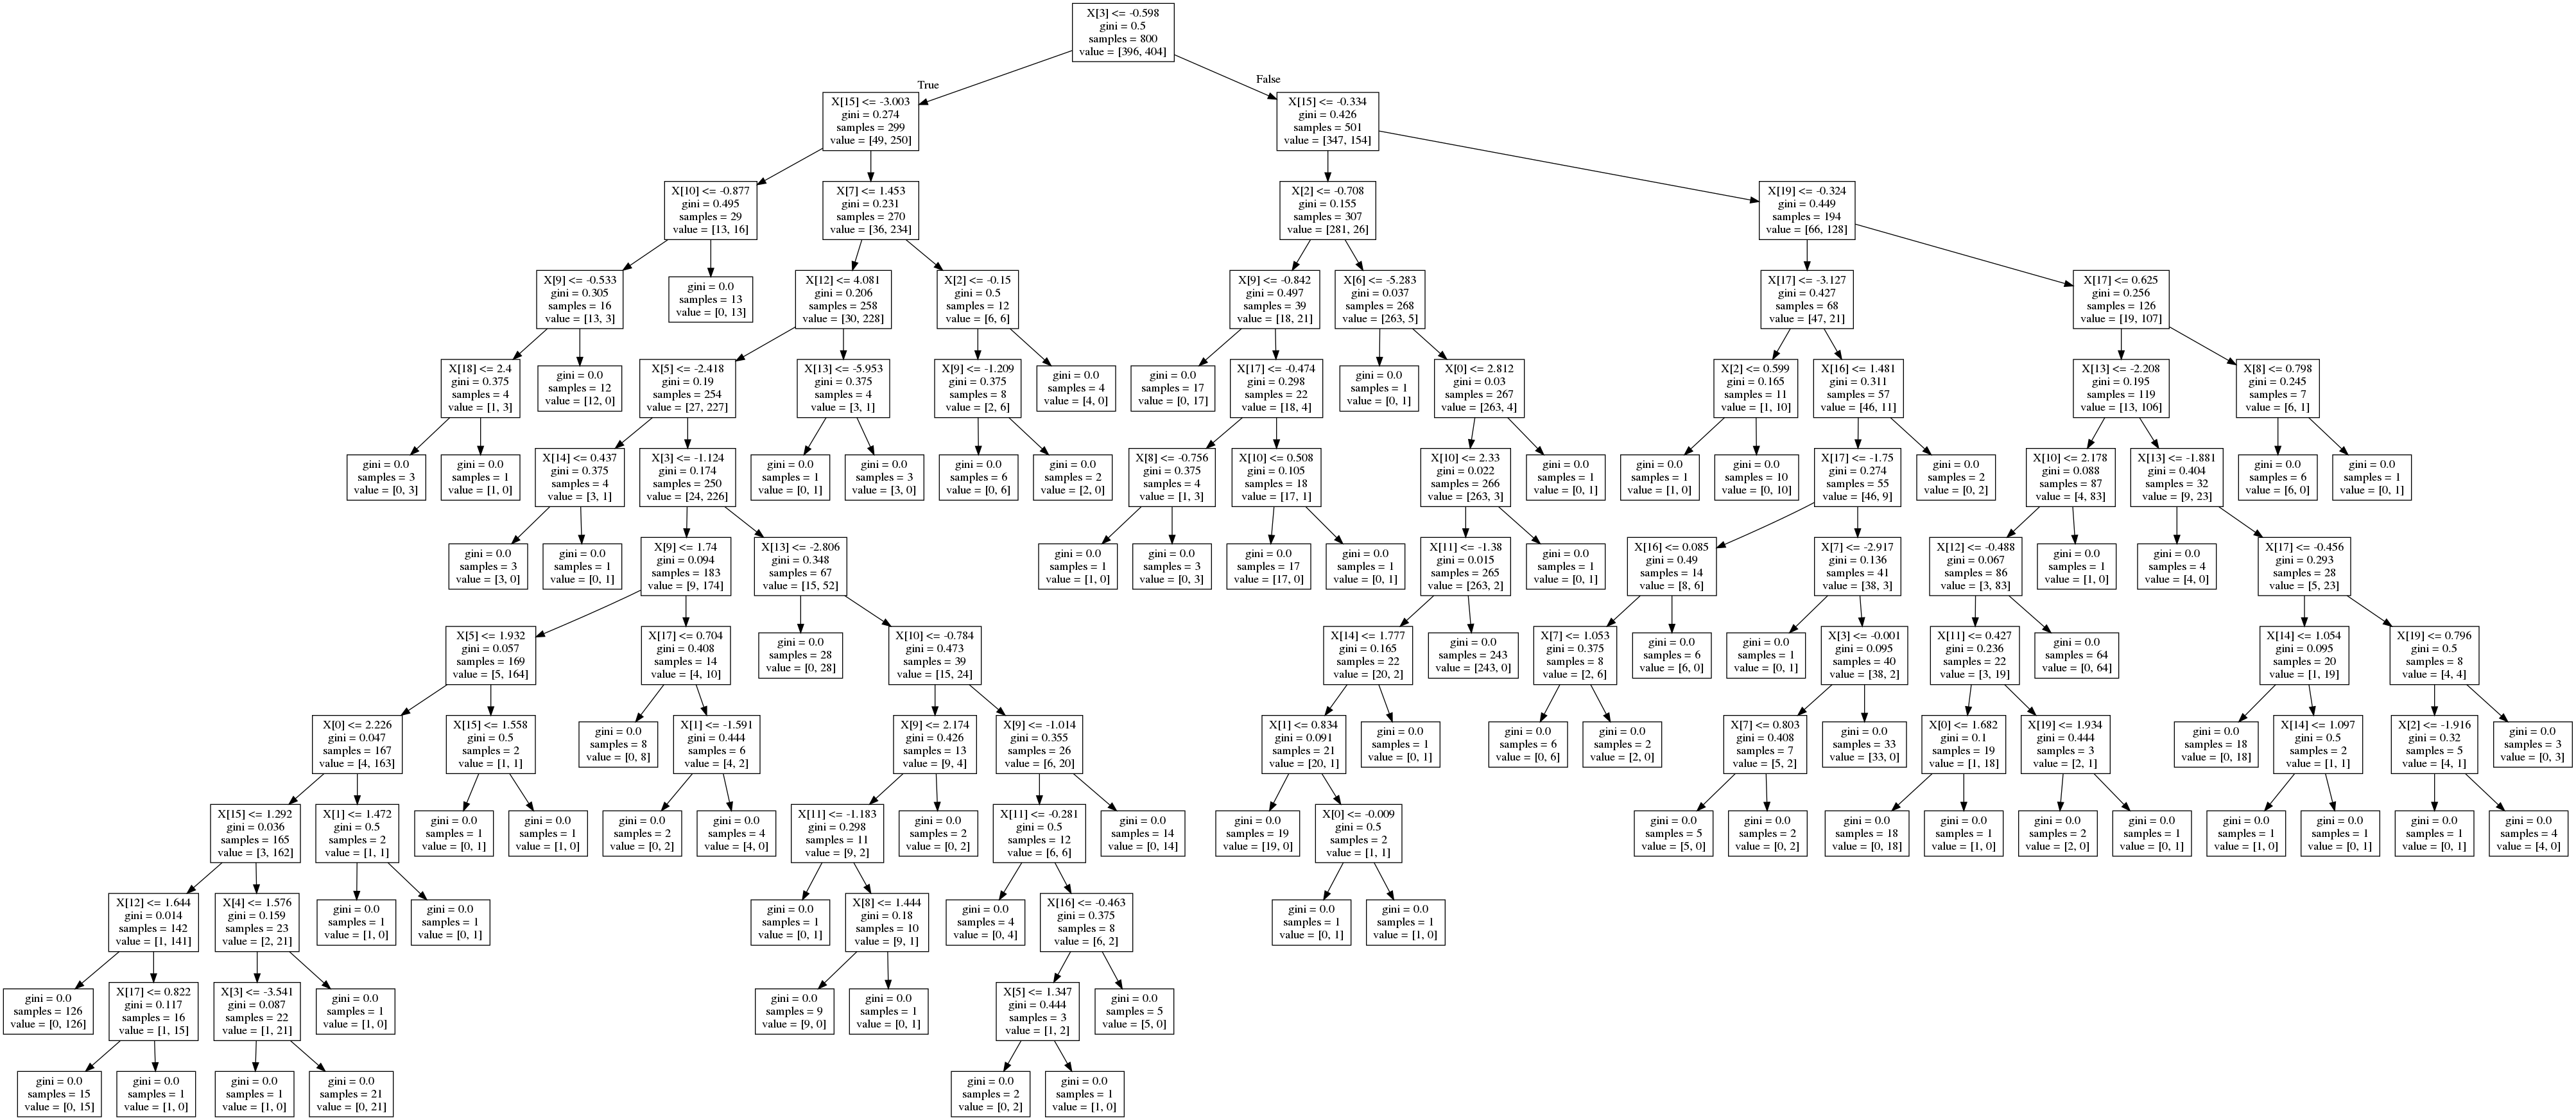

In [99]:
dt_viz_file='../dt.dot'
dt_png_file='../dt.png'
export_graphviz(decision_tree,out_file=dt_viz_file)
#convert to png
command=["dot","-Tpng",dt_viz_file,"-o",dt_png_file]
subprocess.check_call(command)
Image(filename=dt_png_file)

In [101]:
#ada boost
adaboost=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                            algorithm='SAMME',n_estimators=1000,random_state=seed)
adaboost.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=1000, random_state=104)

In [112]:
adaboost_y_pred=adaboost.predict(X_test)
adaboost_y_pred_prob=adaboost.predict_proba(X_test)
adaboost_accuracy=accuracy_score(y_test,adaboost_y_pred)
adaboost_logloss=log_loss(y_test,adaboost_y_pred_prob)
print("ada boost accuracy: {0:.2f}".format(adaboost_accuracy))
print("log loss: {0:.2f}".format(adaboost_logloss))

ada boost accuracy: 0.84
log loss: 0.68


In [116]:
print(y_test[:5,])
print(adaboost_y_pred[:5,])
adaboost_y_pred_prob[:5,]

[1 1 0 0 0]
[1 0 0 0 0]


array([[0.48396329, 0.51603671],
       [0.49868559, 0.50131441],
       [0.49892766, 0.50107234],
       [0.50151698, 0.49848302],
       [0.50566436, 0.49433564]])

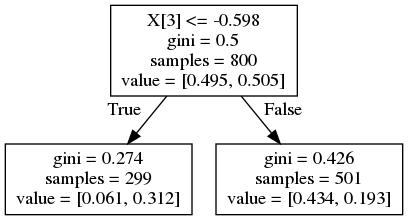

In [123]:
ada_t1=adaboost.estimators_[0]
ada_t1_viz_file = '../ada-t1.dot'
ada_t1_png_file = '../ada-t1.png'

export_graphviz(ada_t1, out_file=ada_t1_viz_file)
# convert to PNG
command = ["dot", "-Tpng", ada_t1_viz_file, "-o", ada_t1_png_file]
subprocess.check_call(command)

# display image
Image(filename=ada_t1_png_file)

In [130]:
print("error is {0:.2f}".format(adaboost.estimator_errors_[0]))
print("tree importance is {0:.2f}".format(adaboost.estimator_weights_[0]))

error is 0.25
tree importance is 1.08


In [133]:
#gradient boosted trees
gbc=GradientBoostingClassifier(max_depth=1,n_estimators=1000,warm_start=True,random_state=seed)
gbc.fit(X_train,y_train)
gbc_y_pred=gbc.predict(X_test)
gbc_y_pred_prob=gbc.predict_proba(X_test)

In [134]:
gbc_accuracy=accuracy_score(y_test,gbc_y_pred)
gbc_logloss=log_loss(y_test,gbc_y_pred_prob)

print(gbc_accuracy)
print(gbc_logloss)

0.845
0.3404427404748684


In [135]:
print('True labels:')
print(y_test[:5,])
print('\nPredicted labels:')
print(gbc_y_pred[:5,])
print('\nPredicted probabilities:')
print(gbc_y_pred_prob[:5,])

True labels:
[1 1 0 0 0]

Predicted labels:
[1 0 0 0 0]

Predicted probabilities:
[[0.12344095 0.87655905]
 [0.69217302 0.30782698]
 [0.83598136 0.16401864]
 [0.9159873  0.0840127 ]
 [0.99863653 0.00136347]]


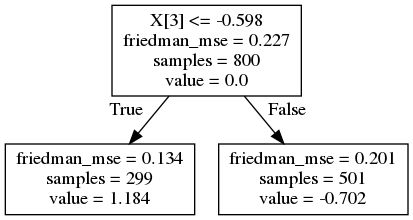

In [144]:
gbc_t1 = gbc.estimators_[2][0]
gbc_t1_viz_file = '../gbc-t1.dot'
gbc_t1_png_file = '../gbc-t1.png'

# create visualization
export_graphviz(gbc_t1, out_file=gbc_t1_viz_file)

# convert to PNG
command = ["dot", "-Tpng", gbc_t1_viz_file, "-o", gbc_t1_png_file]
subprocess.check_call(command)

# display image
Image(filename=gbc_t1_png_file)